导入数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

#解决中文乱码问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
df1=pd.read_csv('C:\\Users\\asus\\Desktop\\US_Accidents_Dec20_Updated.csv')
df1.info()


C:\Users\asus\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346376 entries, 0 to 346375
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     346376 non-null  object 
 1   Severity               346376 non-null  int64  
 2   Start_Time             346376 non-null  object 
 3   End_Time               346376 non-null  object 
 4   Start_Lat              346376 non-null  float64
 5   Start_Lng              346376 non-null  float64
 6   End_Lat                312620 non-null  float64
 7   End_Lng                312619 non-null  float64
 8   Distance(mi)           346375 non-null  float64
 9   Description            346375 non-null  object 
 10  Number                 121416 non-null  float64
 11  Street                 346375 non-null  object 
 12  Side                   346375 non-null  object 
 13  City                   346363 non-null  object 
 14  County                 346375 non-nu

In [3]:
df = df1.loc[:,['ID','Start_Time','End_Lng','End_Lat','Severity']]
df

,ID,Start_Time,End_Lng,End_Lat,Severity
0,A-1,2019-05-21 08:29:55,-82.269157,34.808868,2
1,A-2,2019-10-07 17:43:09,-80.745560,35.090080,2
2,A-3,2020-12-13 21:53:00,-121.988062,37.165850,2
3,A-4,2018-04-17 16:51:23,-119.773781,39.110390,2
4,A-5,2016-08-31 17:40:49,-80.265091,26.102942,3
...,...,...,...,...,...
346371,A-346372,2017-03-11 01:29:40,-87.656310,41.842440,3
346372,A-346373,2020-03-29 12:22:42,-75.296160,40.010480,2
346373,A-346374,2017-12-14 15:16:29,-81.613010,30.448270,4
346374,A-346375,2018-11-24 11:48:48,-120.938148,38.662575,2


In [4]:
#creating the column, hour,day,month and year
#creating year column
def year(string):
    return int(string[0:4])
df['Year']=df['Start_Time'].apply(lambda x: year(x))
#creating month column
def month(string):
    return int(string[5:7])
df['Month']=df['Start_Time'].apply(lambda x: month(x))
#creating day column
def day(string):
    return int(string[8:10])
df['Day']=df['Start_Time'].apply(lambda x: day(x))

In [5]:
df

,ID,Start_Time,End_Lng,End_Lat,Severity,Year,Month,Day
0,A-1,2019-05-21 08:29:55,-82.269157,34.808868,2,2019,5,21
1,A-2,2019-10-07 17:43:09,-80.745560,35.090080,2,2019,10,7
2,A-3,2020-12-13 21:53:00,-121.988062,37.165850,2,2020,12,13
3,A-4,2018-04-17 16:51:23,-119.773781,39.110390,2,2018,4,17
4,A-5,2016-08-31 17:40:49,-80.265091,26.102942,3,2016,8,31
...,...,...,...,...,...,...,...,...
346371,A-346372,2017-03-11 01:29:40,-87.656310,41.842440,3,2017,3,11
346372,A-346373,2020-03-29 12:22:42,-75.296160,40.010480,2,2020,3,29
346373,A-346374,2017-12-14 15:16:29,-81.613010,30.448270,4,2017,12,14
346374,A-346375,2018-11-24 11:48:48,-120.938148,38.662575,2,2018,11,24


In [6]:
dft1 = df.copy() #把原先的数据copy一份，在副本中操作
dft1['date'] = pd.to_datetime(df[['Year',  'Month','Day']])
print(dft1)
dft1['date']=pd.to_datetime(dft1['date'])
dft2 = dft1.groupby('date' , as_index = False).count()
dfts=dft2
#df2.index = pd.DatetimeIndex(df2['date'])
dft2

              ID           Start_Time     End_Lng    End_Lat  Severity  Year  \
0            A-1  2019-05-21 08:29:55  -82.269157  34.808868         2  2019   
1            A-2  2019-10-07 17:43:09  -80.745560  35.090080         2  2019   
2            A-3  2020-12-13 21:53:00 -121.988062  37.165850         2  2020   
3            A-4  2018-04-17 16:51:23 -119.773781  39.110390         2  2018   
4            A-5  2016-08-31 17:40:49  -80.265091  26.102942         3  2016   
...          ...                  ...         ...        ...       ...   ...   
346371  A-346372  2017-03-11 01:29:40  -87.656310  41.842440         3  2017   
346372  A-346373  2020-03-29 12:22:42  -75.296160  40.010480         2  2020   
346373  A-346374  2017-12-14 15:16:29  -81.613010  30.448270         4  2017   
346374  A-346375  2018-11-24 11:48:48 -120.938148  38.662575         2  2018   
346375  A-346376  2018-04-30 22:45:17         NaN  37.000000         3  2018   

        Month  Day       date  
0      

,date,ID,Start_Time,End_Lng,End_Lat,Severity,Year,Month,Day
0,2016-02-08,4,4,3,3,4,4,4,4
1,2016-02-09,5,5,4,4,5,5,5,5
2,2016-02-10,7,7,7,7,7,7,7,7
3,2016-02-11,6,6,6,6,6,6,6,6
4,2016-02-12,2,2,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...
1773,2020-12-27,583,583,581,581,583,583,583,583
1774,2020-12-28,1029,1029,1022,1022,1029,1029,1029,1029
1775,2020-12-29,983,983,975,975,983,983,983,983
1776,2020-12-30,1121,1121,1114,1114,1121,1121,1121,1121


In [7]:
dfts

,date,ID,Start_Time,End_Lng,End_Lat,Severity,Year,Month,Day
0,2016-02-08,4,4,3,3,4,4,4,4
1,2016-02-09,5,5,4,4,5,5,5,5
2,2016-02-10,7,7,7,7,7,7,7,7
3,2016-02-11,6,6,6,6,6,6,6,6
4,2016-02-12,2,2,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...
1773,2020-12-27,583,583,581,581,583,583,583,583
1774,2020-12-28,1029,1029,1022,1022,1029,1029,1029,1029
1775,2020-12-29,983,983,975,975,983,983,983,983
1776,2020-12-30,1121,1121,1114,1114,1121,1121,1121,1121


In [8]:
dft2.drop(['Start_Time'] , axis = 1 ,inplace = True)
dft2.drop(['Year'] , axis = 1 ,inplace = True)
dft2.drop(['Month'] , axis = 1 ,inplace = True)
dft2.drop(['Day'] , axis = 1 ,inplace = True)
print(dft2)

           date    ID  End_Lng  End_Lat  Severity
0    2016-02-08     4        3        3         4
1    2016-02-09     5        4        4         5
2    2016-02-10     7        7        7         7
3    2016-02-11     6        6        6         6
4    2016-02-12     2        1        1         2
...         ...   ...      ...      ...       ...
1773 2020-12-27   583      581      581       583
1774 2020-12-28  1029     1022     1022      1029
1775 2020-12-29   983      975      975       983
1776 2020-12-30  1121     1114     1114      1121
1777 2020-12-31   859      852      852       859

[1778 rows x 5 columns]


探索数据集

In [9]:

dft1=dft1[dft1.Year==2020]
dft1=dft1[dft1.Month==12]
dft1=dft1[dft1.Day>=25]

In [10]:
dft1.dropna(axis=0,how='any',inplace=True)
dft1

,ID,Start_Time,End_Lng,End_Lat,Severity,Year,Month,Day,date
144,A-145,2020-12-27 05:22:00,-120.867389,38.454234,2,2020,12,27,2020-12-27
298,A-299,2020-12-30 17:22:00,-73.232937,41.166261,2,2020,12,30,2020-12-30
334,A-335,2020-12-25 04:44:37.000000000,-82.690338,34.438068,2,2020,12,25,2020-12-25
412,A-413,2020-12-28 03:01:00.000000000,-82.488597,27.388457,2,2020,12,28,2020-12-28
452,A-453,2020-12-29 19:52:58,-94.592655,39.165873,2,2020,12,29,2020-12-29
...,...,...,...,...,...,...,...,...,...
345787,A-345788,2020-12-30 21:50:11,-119.837162,43.530874,2,2020,12,30,2020-12-30
345977,A-345978,2020-12-30 20:41:45,-86.475292,39.614818,2,2020,12,30,2020-12-30
346034,A-346035,2020-12-30 01:32:26,-75.070327,39.817662,2,2020,12,30,2020-12-30
346119,A-346120,2020-12-26 02:22:00,-77.597862,37.348939,2,2020,12,26,2020-12-26


In [11]:
import os, math
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [110]:
map_ = folium.Map(location=[44, -102], tiles='openstreetmap', zoom_start=4)

for i in range(0,len(dft1)):
    Circle(
        location=[dft1.iloc[i]['End_Lat'], dft1.iloc[i]['End_Lng']],
        radius=20000,
        color='red').add_to(map_)

map_.save('bubble.html')

Heatmap

In [111]:
map_ = folium.Map(location=[44, -102], tiles='cartodbpositron', zoom_start=4)

HeatMap(data=dft1[['End_Lat', 'End_Lng']], radius=10).add_to(map_)

# Display the map
map_.save('heatmap.html')

accident serverity表现

In [112]:
map_ = folium.Map(location=[44, -102], tiles='openstreetmap', zoom_start=4)

for i in range(0,len(dft1)):
    Circle(
        location=[dft1.iloc[i]['End_Lat'], dft1.iloc[i]['End_Lng']],
        radius=df.iloc[i]['Severity']*10000.0,
        color='yellow', fill=True).add_to(map_)

map_.save('severity.html')

In [12]:
dft2

,date,ID,End_Lng,End_Lat,Severity
0,2016-02-08,4,3,3,4
1,2016-02-09,5,4,4,5
2,2016-02-10,7,7,7,7
3,2016-02-11,6,6,6,6
4,2016-02-12,2,1,1,2
...,...,...,...,...,...
1773,2020-12-27,583,581,581,583
1774,2020-12-28,1029,1022,1022,1029
1775,2020-12-29,983,975,975,983
1776,2020-12-30,1121,1114,1114,1121


时间序列分析 预测下一年将会发生的事故数量

探索性数据分析

In [13]:
dft3=dft2.copy()
dft2.index = pd.DatetimeIndex(dft2['date'])
dft2.drop(['End_Lng'] , axis = 1 ,inplace = True)
dft2.drop(['End_Lat'] , axis = 1 ,inplace = True)
dft2.drop(['Severity'] , axis = 1 ,inplace = True)
dft2.drop(['date'] , axis = 1 ,inplace = True)
dft2.rename(columns={'ID':'Acc_num'},inplace=True)
dft2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1778 entries, 2016-02-08 to 2020-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Acc_num  1778 non-null   int64
dtypes: int64(1)
memory usage: 27.8 KB


In [14]:
dft2

,Acc_num
date,
2016-02-08,4
2016-02-09,5
2016-02-10,7
2016-02-11,6
2016-02-12,2
...,...
2020-12-27,583
2020-12-28,1029
2020-12-29,983


共有1778行数据，每一行数据都表示一天，表示从2016年2月8日到2020年12月31号这近五年间美国全国范围内每天发生的事故数量

In [15]:
dft3

,date,ID,End_Lng,End_Lat,Severity
0,2016-02-08,4,3,3,4
1,2016-02-09,5,4,4,5
2,2016-02-10,7,7,7,7
3,2016-02-11,6,6,6,6
4,2016-02-12,2,1,1,2
...,...,...,...,...,...
1773,2020-12-27,583,581,581,583
1774,2020-12-28,1029,1022,1022,1029
1775,2020-12-29,983,975,975,983
1776,2020-12-30,1121,1114,1114,1121


绘制折线图

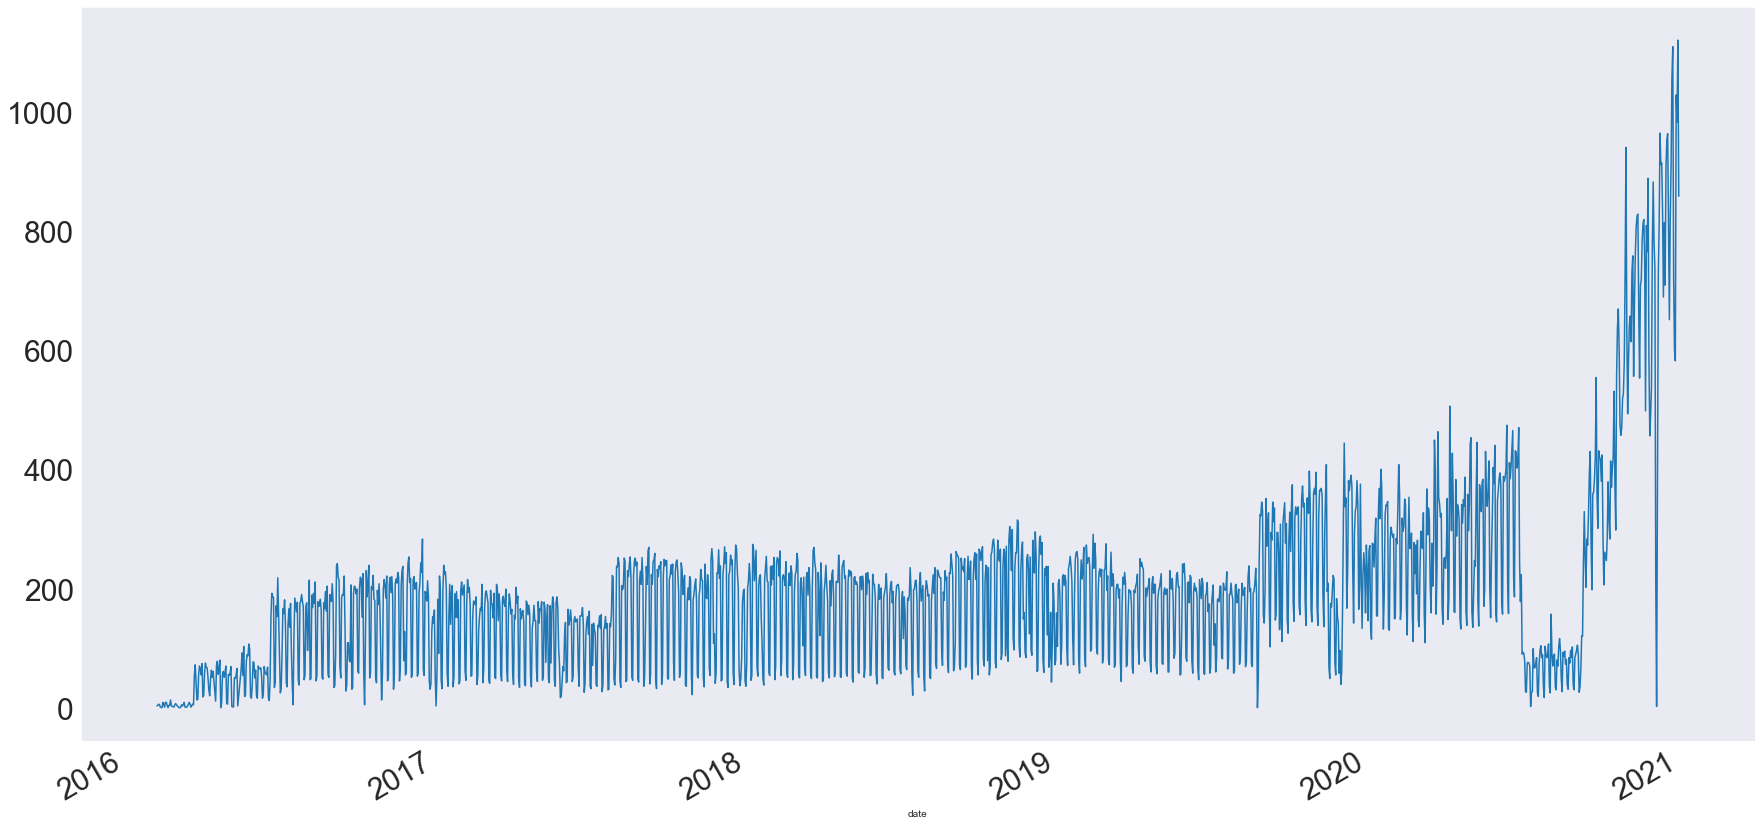

In [17]:
dft2['Acc_num'].plot(figsize=(30,15))

#设置坐标字体大小
plt.tick_params(labelsize=30)
#生成刻度线网格
plt.grid()

折线图容易产生毛刺，可以换成散点图

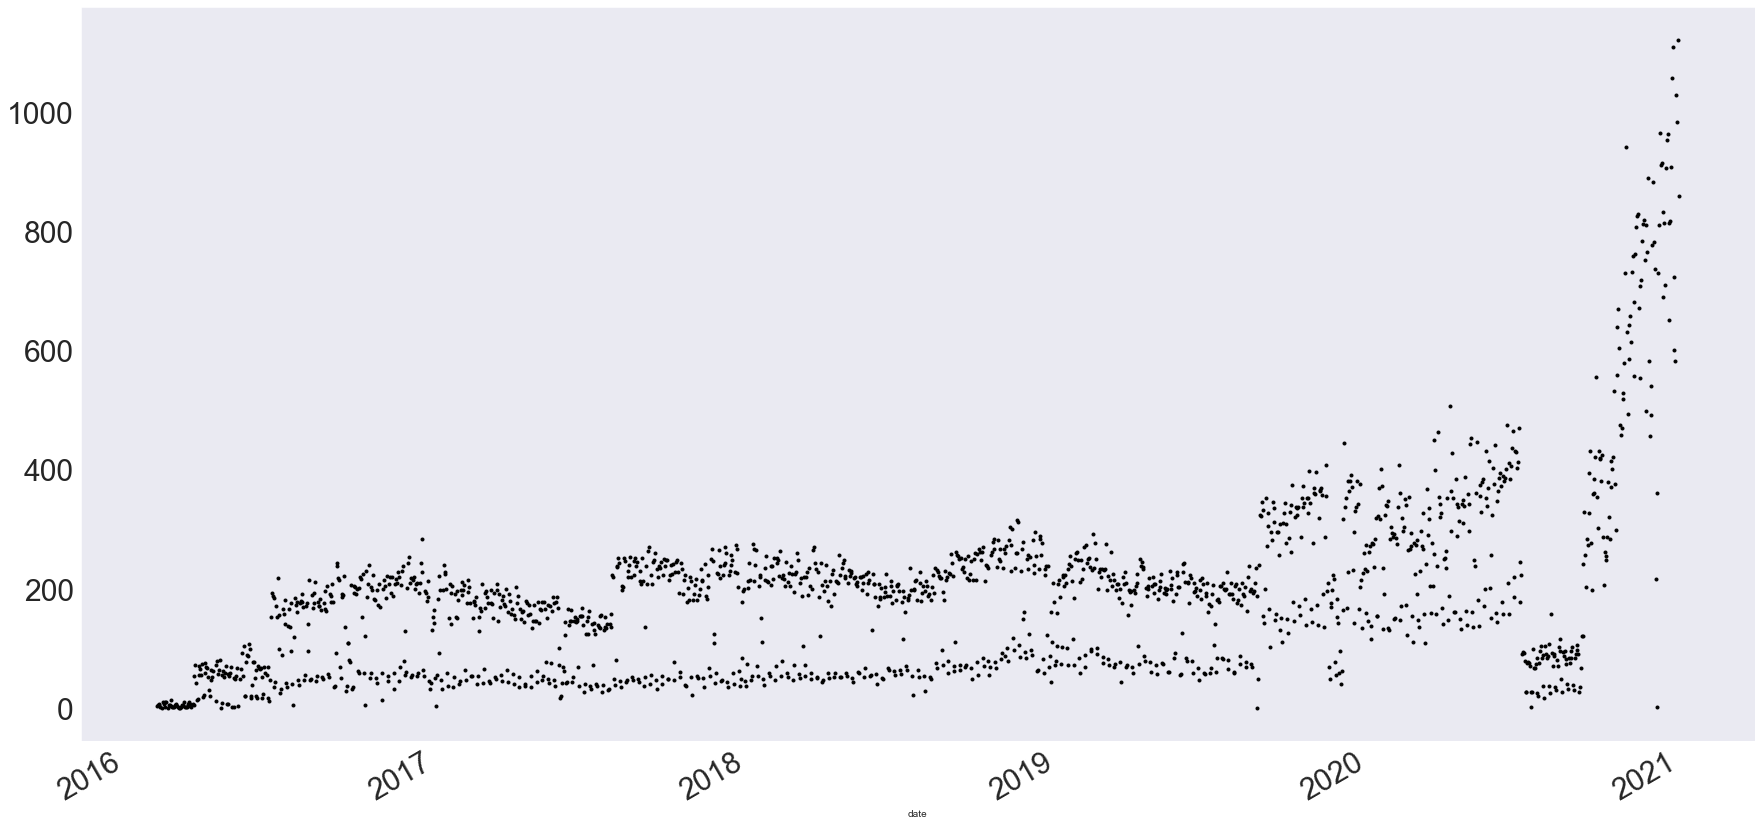

In [18]:
dft2['Acc_num'].plot(style='k.',figsize=(30,15))
#设置坐标字体大小
plt.tick_params(labelsize=30)
#生成刻度线网格
plt.grid()

In [19]:
d=dft2[:1460]
d

,Acc_num
date,
2016-02-08,4
2016-02-09,5
2016-02-10,7
2016-02-11,6
2016-02-12,2
...,...
2020-02-12,305
2020-02-13,351
2020-02-14,341


发现由于自2020年疫情的影响，2020-2021年间发生的交通事故数量明显增加，所以先研究2016-2020年间，探寻一般情况下的规律似乎存在季节和年份的周期性变化

In [20]:
dft3=dft2[318:]

In [21]:
dft3

,Acc_num
date,
2017-01-01,4
2017-01-02,56
2017-01-03,183
2017-01-04,92
2017-01-05,222
...,...
2020-12-27,583
2020-12-28,1029
2020-12-29,983


绘制直方图

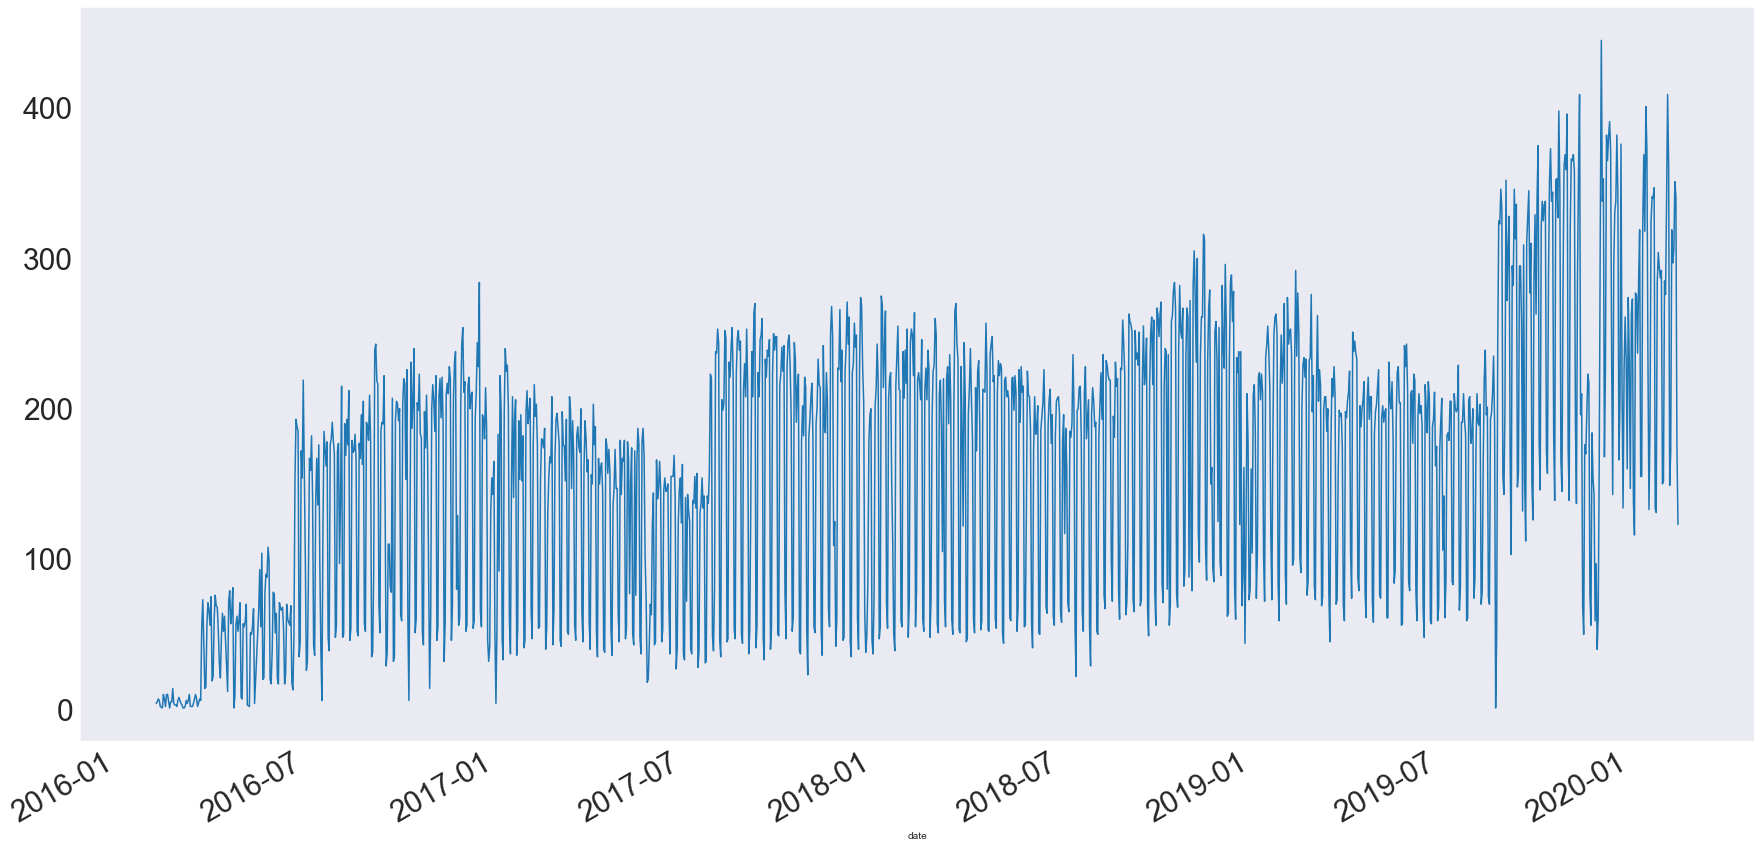

In [22]:
d['Acc_num'].plot(figsize=(30,15))

#设置坐标字体大小
plt.tick_params(labelsize=30)
#生成刻度线网格
plt.grid()

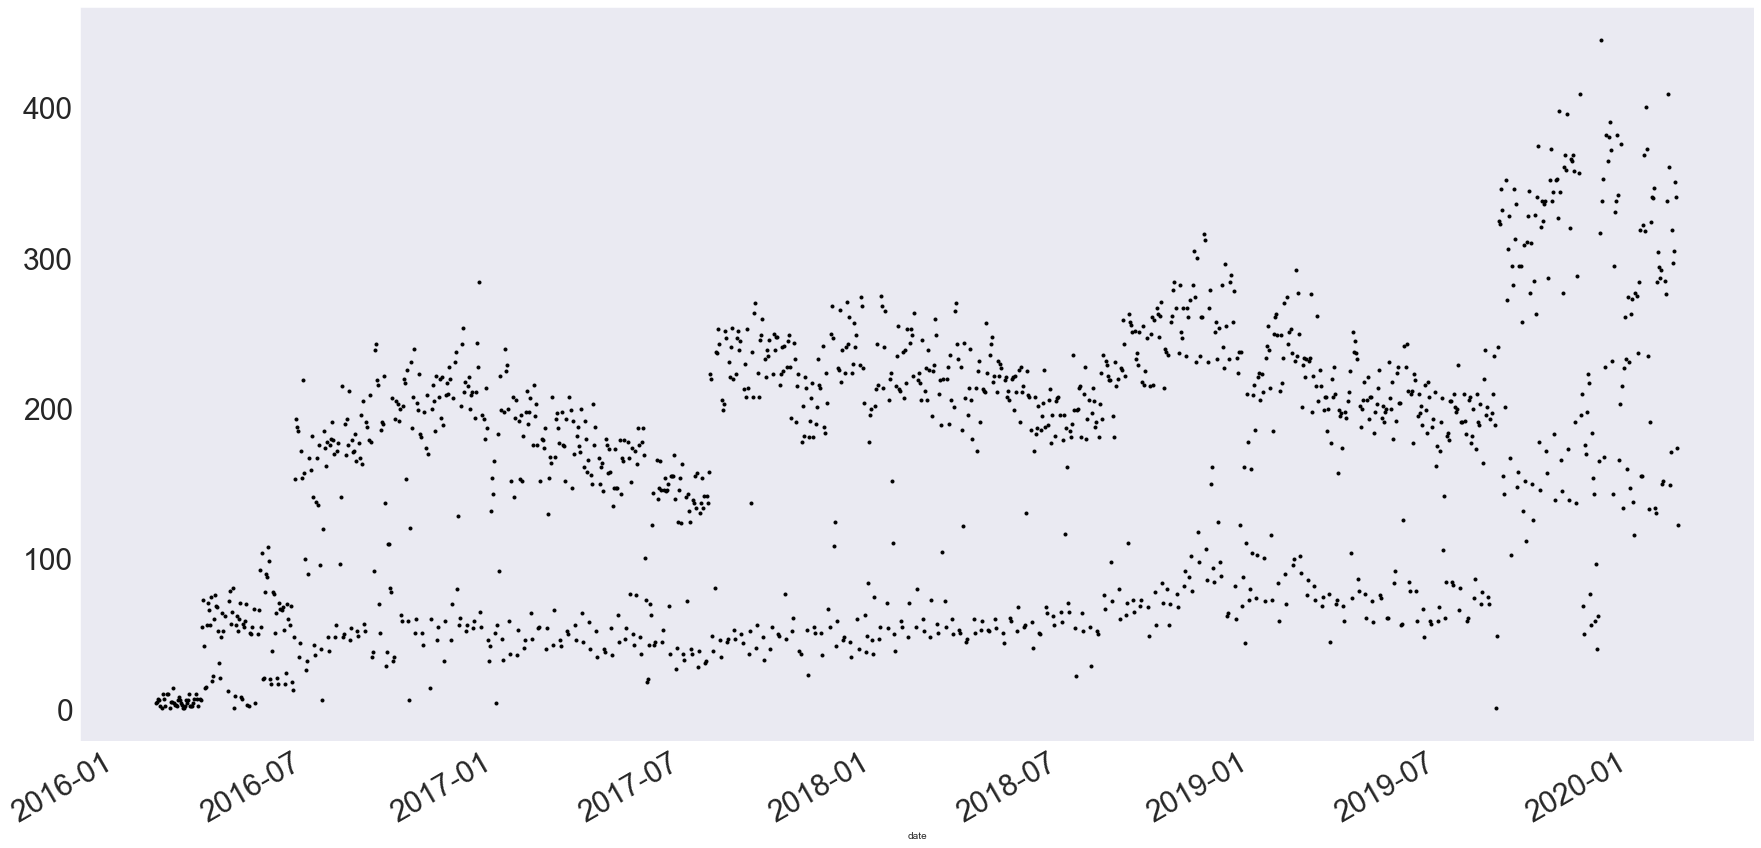

In [23]:
d['Acc_num'].plot(style='k.',figsize=(30,15))
#设置坐标字体大小
plt.tick_params(labelsize=30)
#生成刻度线网格
plt.grid()

<AxesSubplot:ylabel='Frequency'>

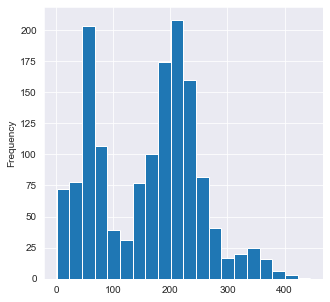

In [24]:
#设置绘图大小
plt.style.use({'figure.figsize':(5,5)})
d['Acc_num'].plot(kind='hist',bins=20)

<AxesSubplot:>

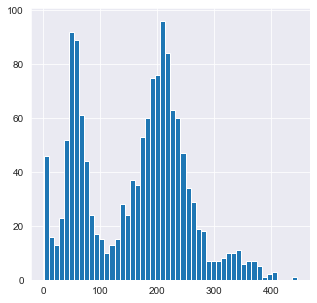

In [25]:
d['Acc_num'].hist(bins=50)

bins分的格数越多，划分得越精确，锯齿现象越明显

堆积面积图

<AxesSubplot:xlabel='date'>

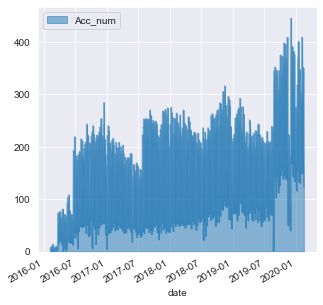

In [26]:
import seaborn as sns
d.plot.area(stacked=False)

概率密度分布图（KDE图）

<AxesSubplot:ylabel='Density'>

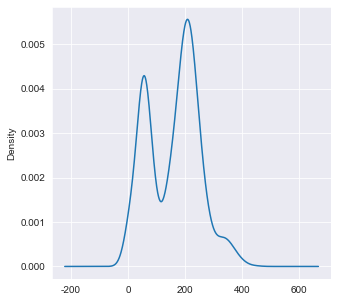

In [27]:
d['Acc_num'].plot(kind='kde')

热力图

例如将2019年每一个月发生的事故数用热力图展示出来

In [29]:
#设置绘图大小
plt.style.use({'figure.figsize':(20,8)})
dft2['2018'].resample('M').mean().T

date,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31
Acc_num,173.193548,180.714286,168.548387,168.466667,172.258065,154.366667,152.83871,177.935484,178.933333,203.741935,203.833333,171.903226


<AxesSubplot:xlabel='date'>

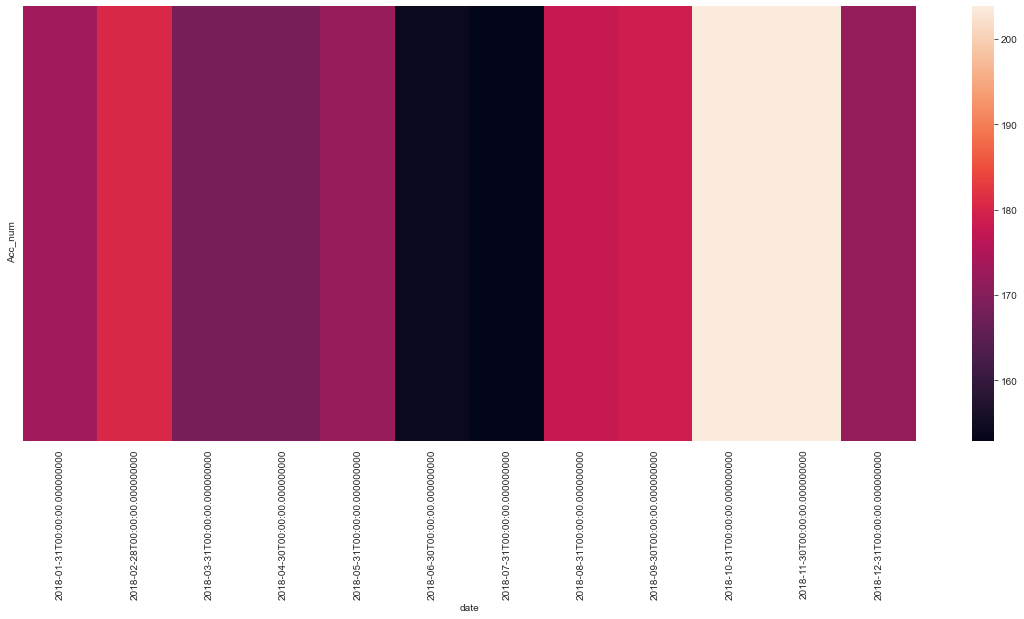

In [30]:
sns.heatmap(dft2['2018'].resample('M').mean().T)

In [31]:
d

,Acc_num
date,
2016-02-08,4
2016-02-09,5
2016-02-10,7
2016-02-11,6
2016-02-12,2
...,...
2020-02-12,305
2020-02-13,351
2020-02-14,341


In [32]:
groups=dft3.groupby(pd.Grouper(freq='1Y'))['Acc_num']
print(groups)
from pandas import DataFrame
years=DataFrame()
for name,group in groups:
    years[name.year]=group.values
years

,2017,2018,2019,2020
0,4,75,104,147
1,56,202,209,263
2,183,213,216,273
3,92,243,186,138
4,222,216,74,116
...,...,...,...,...
360,178,210,261,583
361,196,178,233,1029
362,200,73,160,983
363,46,80,274,1121


绘制每年的变化折线图、箱型图、热力图、小提琴图

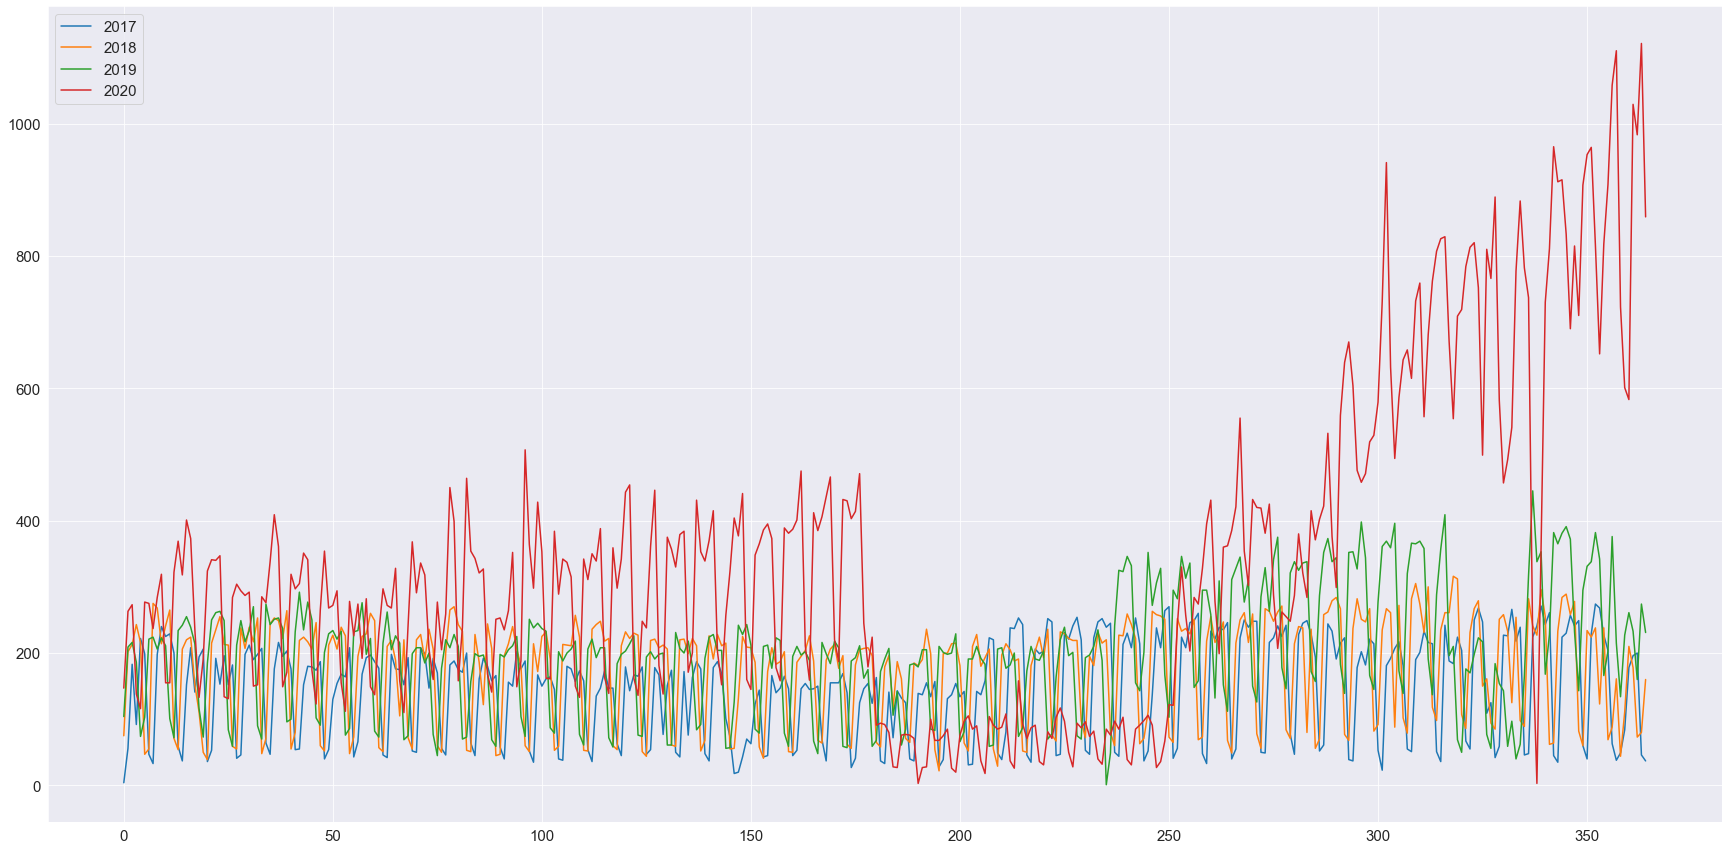

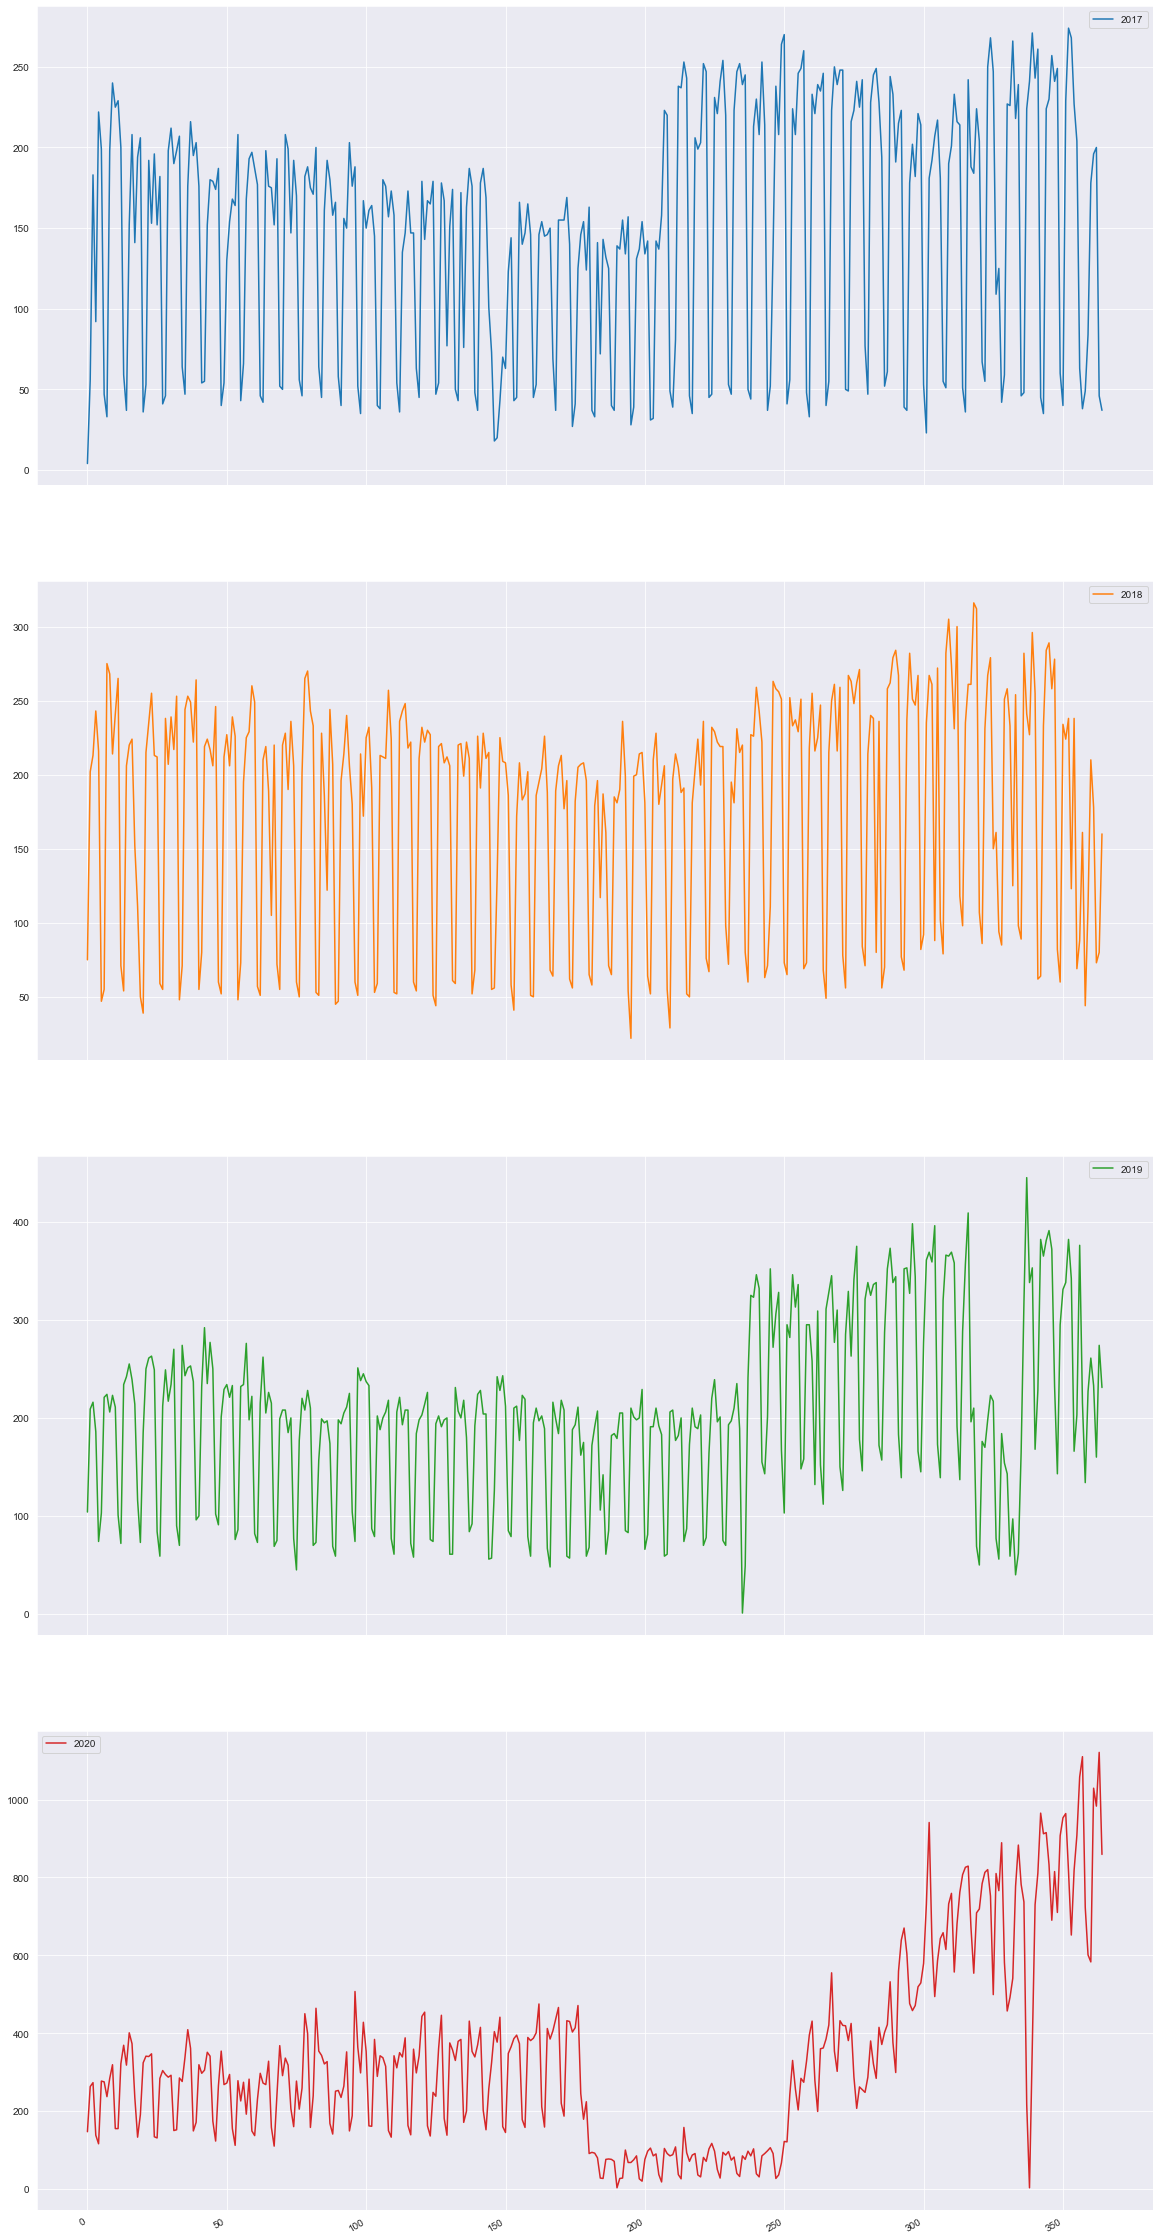

In [33]:
#设置绘图大小
plt.style.use({'figure.figsize':(30,15)})
years.plot()
#设置图例文字大小和图示大小
plt.legend(fontsize=15,markerscale=15)
#设置坐标文字大小
plt.tick_params(labelsize=15)

years.plot(subplots=True,figsize=(20,45))
plt.show()

<AxesSubplot:>

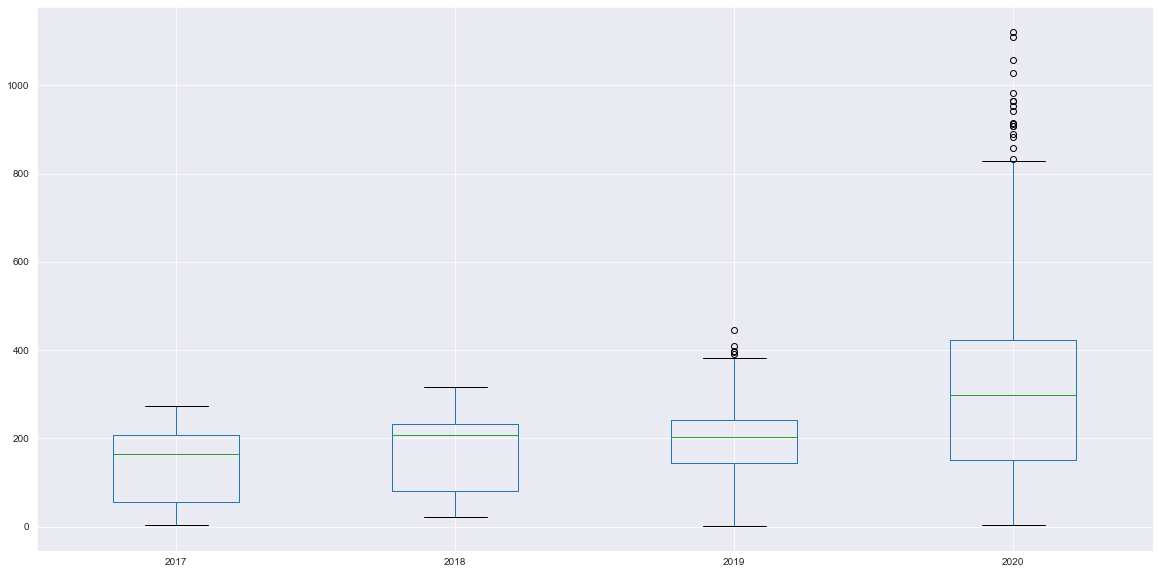

In [34]:
years.boxplot(figsize=(20,10))

通过箱型图是可以快速判断数据的统计特征

<AxesSubplot:>

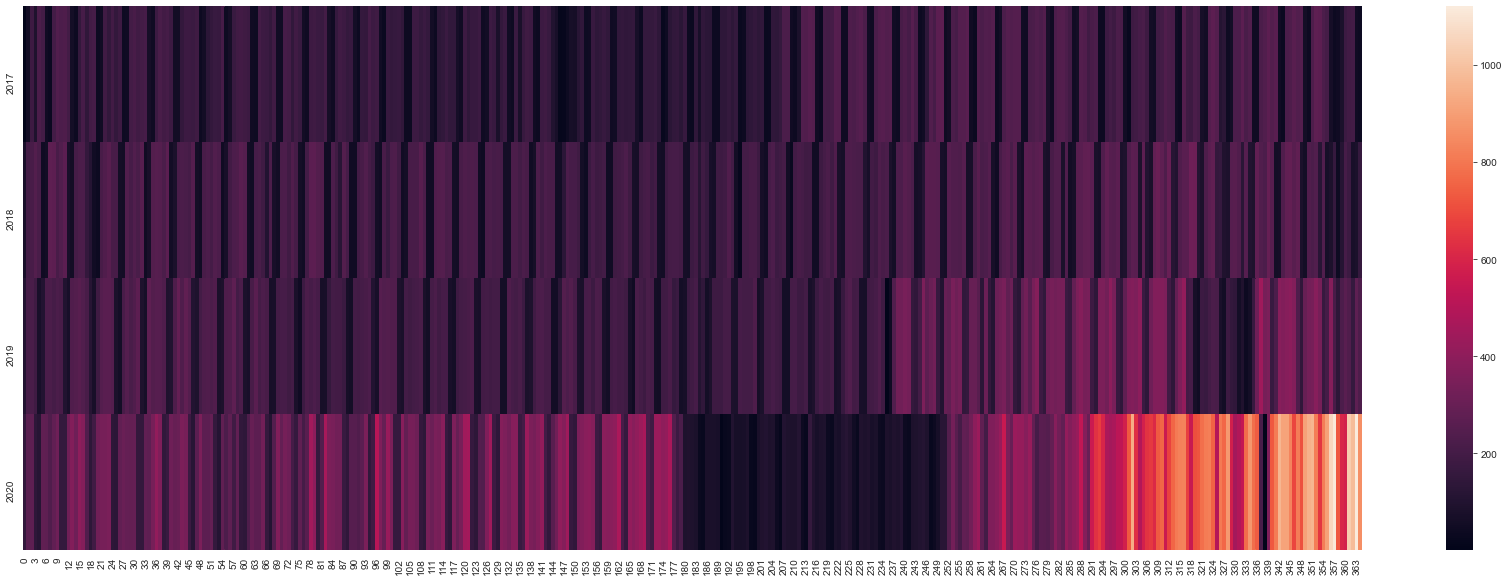

In [35]:
#设置绘图大小
plt.style.use({'figure.figsize':(30,10)})
sns.heatmap(years.T)

将前面获得的矩阵的各个值可视化出来，颜色越深，代表发生的数量越少，每一行是每一年，每一列是每一天，便可以看到1095个数据的全貌

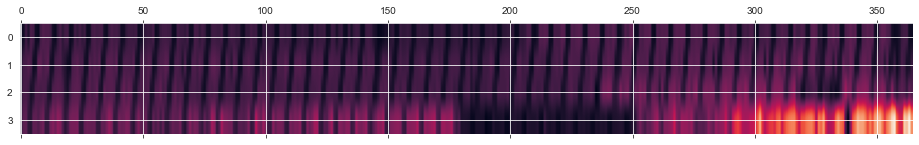

In [36]:
plt.matshow(years.T,interpolation=None,aspect='auto')

绘制每一年的直方图

array([[<AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>],
       [<AxesSubplot:title={'center':'2019'}>,
        <AxesSubplot:title={'center':'2020'}>]], dtype=object)

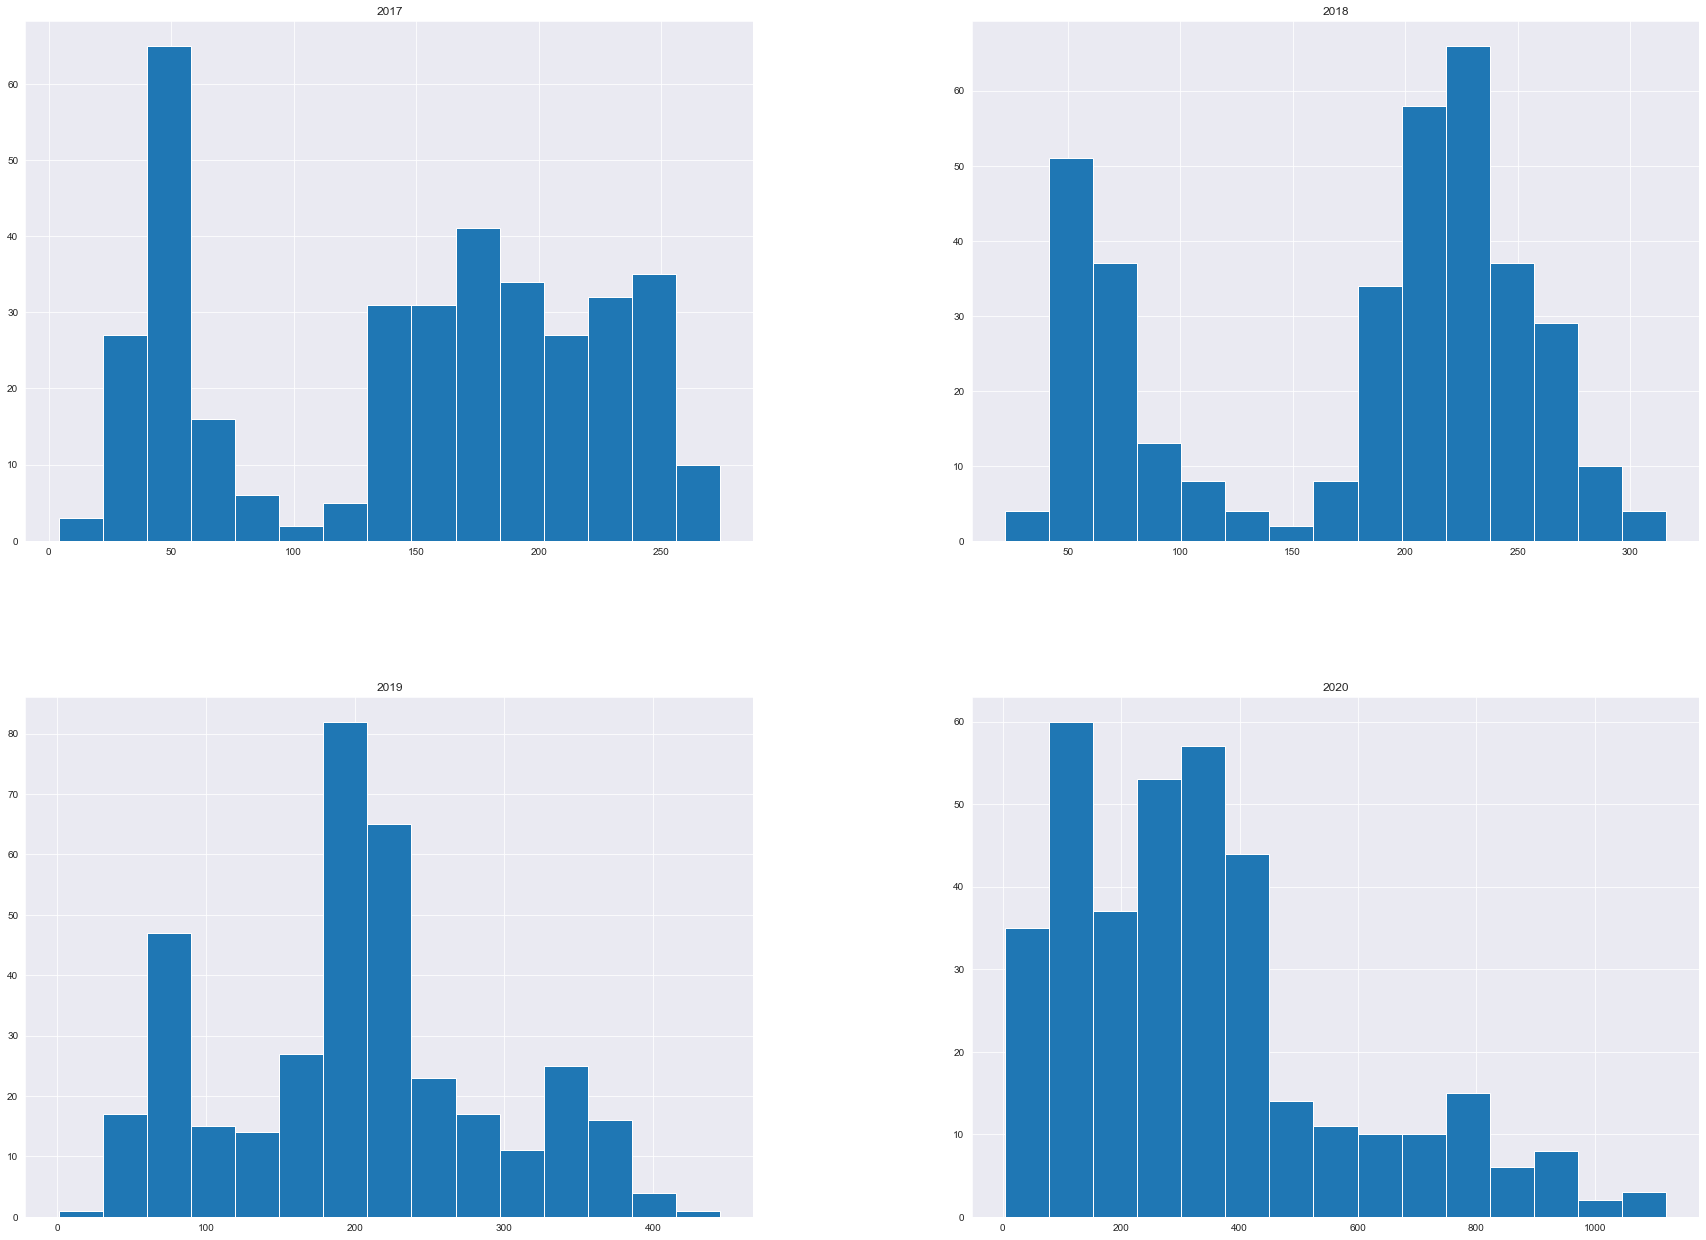

In [37]:
#设置绘图大小
plt.style.use({'figure.figsize':(30,22)})
years.hist(bins=15)

选取2018年这12个月每天的气温数据


Text(0.5, 1.0, '美国2018年每个月发生的交通事故分布箱型图')

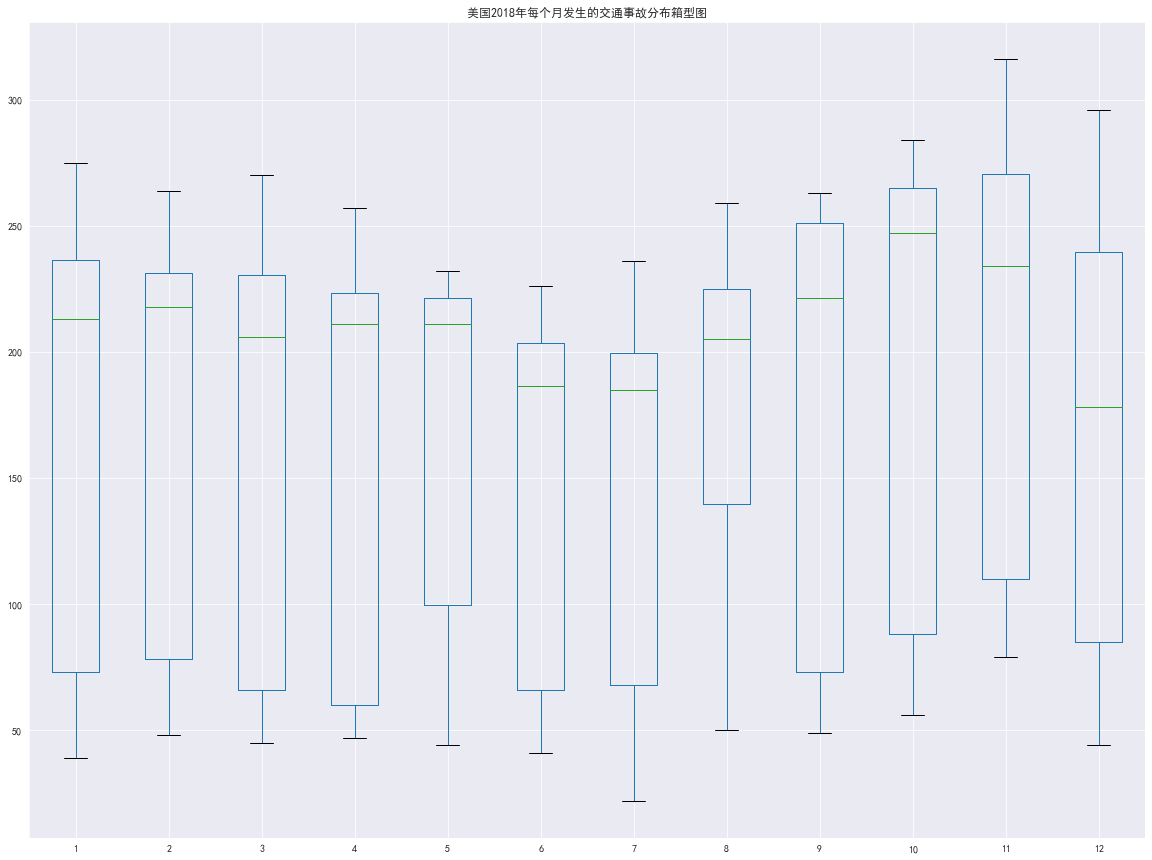

In [38]:
#解决中文乱码问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
groups_month=dft2['2018'].groupby(pd.Grouper(freq='1M'))['Acc_num']
months=pd.concat([DataFrame(x[1].values) for x in groups_month],axis=1)
months=DataFrame(months)
months.columns=range(1,13)
months.boxplot(figsize=(20,15))
plt.title('美国2018年每个月发生的交通事故分布箱型图')

In [39]:
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,75,217.0,260,47.0,232,186.0,58,205,63.0,267,88.0,98
1,202,253.0,249,196.0,222,58.0,179,188,71.0,263,272.0,89
2,213,48.0,57,214.0,230,41.0,196,191,111.0,248,102.0,282
3,243,71.0,51,240.0,227,172.0,117,52,263.0,262,79.0,241
4,216,244.0,210,206.0,51,208.0,187,50,258.0,271,282.0,227
5,47,253.0,219,180.0,44,183.0,161,181,256.0,84,305.0,296
6,55,249.0,189,60.0,219,187.0,71,203,251.0,71,274.0,255
7,275,222.0,105,51.0,221,202.0,65,224,73.0,214,231.0,62
8,268,264.0,220,214.0,208,51.0,185,193,65.0,240,300.0,64
9,214,55.0,72,172.0,212,50.0,181,236,252.0,238,118.0,233


Text(0.5, 1.0, '美国2018年每个月发生的交通事故分布小提琴图')

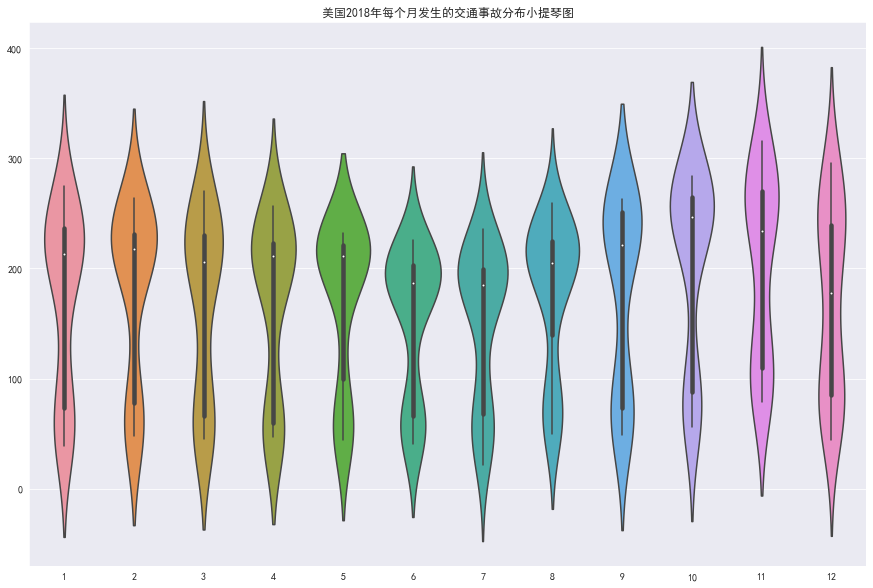

In [40]:
#设置图像大小
plt.style.use({'figure.figsize':(15,10)})
sns.violinplot(data=months)
plt.title('美国2018年每个月发生的交通事故分布小提琴图')

小提琴图和刚刚的箱型图其实一样，小提琴图通过腰的轮廓显示出数据的概率密度分布，小提琴图中间的黑线就是箱型图

Text(0.5, 1.0, '英国2018年每天发生的交通事故数量')

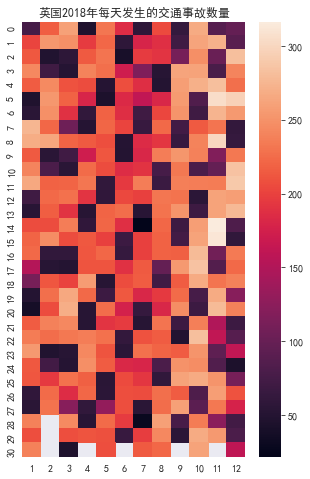

In [41]:
plt.style.use({'figure.figsize':(5,8)})
sns.heatmap(months)
plt.title('英国2018年每天发生的交通事故数量')